In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

44.685851695098705 164.849315217315
63.95985531869502 24.08231822950836
18.642822966793418 -51.24707828394409
8.333910609852254 -96.25136043003964
59.49129092464506 161.54886358035554
-43.839613923520886 23.000137425393376
-32.02519294396224 157.56033985894464
86.73885523171944 138.9129975748994
-65.91203649529106 -60.74353191750822
-59.54223327136173 -166.2802922082522
-89.25117278538822 -58.64882592128677
26.122974861048107 -130.60270755733882
85.770926521973 -12.405319952943898
-21.421033646319373 62.6634694831524
3.373962534249685 -24.741210578965962
13.104865779380603 -107.28571073204563
20.867826998940103 -14.406094102217537
-43.539085340366896 -92.10415633484651
6.966821485610552 -163.86046246412195
48.877751707843146 -41.230624223378015
75.61280777292075 81.76037033773747
-37.25552766142034 27.913538591264
51.68697287680672 -165.15975929158597
52.06904306690569 89.42668861349148
-20.199129912360064 -140.12679399032098
-31.69189259028974 -135.16813681502597
-42.570562010586514 -

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 1 | ylivieska
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | champerico
Processing Record 5 of Set 1 | ossora
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | atar
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | port alfred
Processing Record 22 o

In [11]:
len(city_data)

573

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,14.59,57,75,15.66,RU,2023-01-19 06:21:16
1,Ylivieska,64.0833,24.5500,30.88,89,100,2.71,FI,2023-01-19 06:21:17
2,Bathsheba,13.2167,-59.5167,77.61,78,40,19.57,BB,2023-01-19 06:21:18
3,Champerico,14.3000,-91.9167,74.70,73,44,5.95,GT,2023-01-19 06:21:18
4,Ossora,59.2353,163.0719,-2.38,84,100,8.30,RU,2023-01-19 06:21:19
5,Bredasdorp,-34.5322,20.0403,72.82,66,6,9.08,ZA,2023-01-19 06:17:30
6,Port Macquarie,-31.4333,152.9167,72.90,90,98,13.76,AU,2023-01-19 06:21:20
7,Ushuaia,-54.8000,-68.3000,49.66,81,0,5.75,AR,2023-01-19 06:20:10
8,Avarua,-21.2078,-159.7750,77.05,94,40,8.05,CK,2023-01-19 06:21:21
9,Lompoc,34.6391,-120.4579,44.53,92,40,3.44,US,2023-01-19 06:21:21


In [ ]:
# Redorder columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

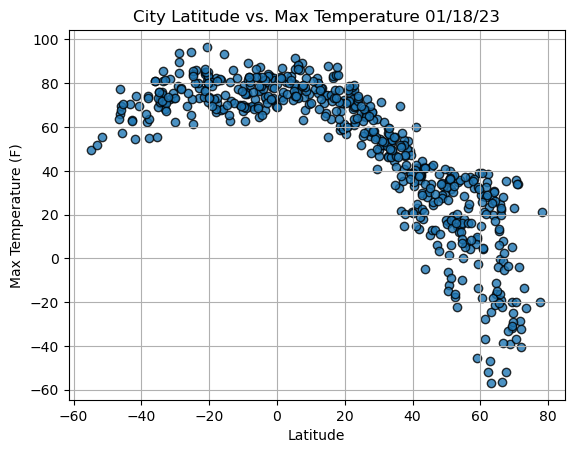

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

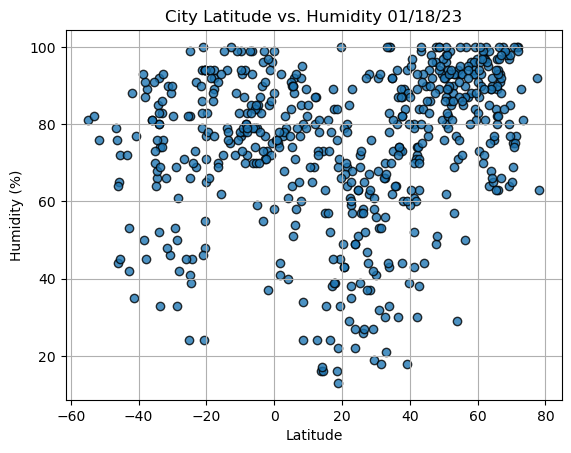

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

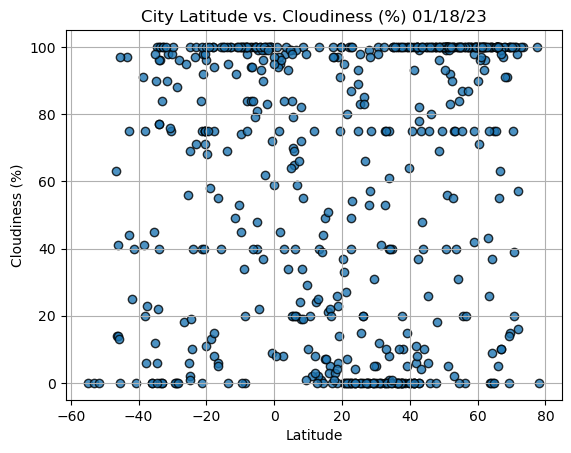

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

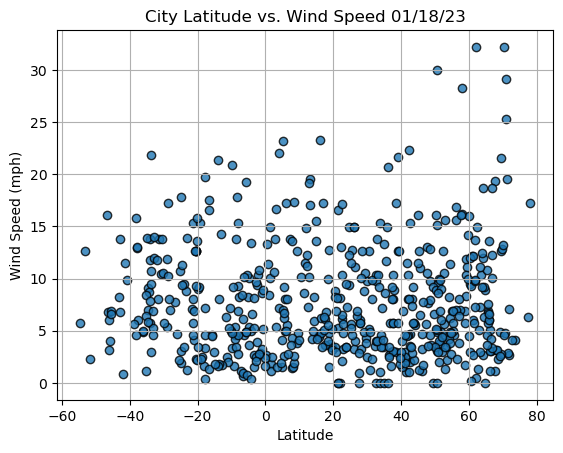

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    61.36
Humidity                       99
Cloudiness                    100
Wind Speed                   3.02
Country                        BR
Date          2023-01-19 06:21:26
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
568     True
569    False
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,14.59,57,75,15.66,RU,2023-01-19 06:21:16
1,Ylivieska,64.0833,24.5500,30.88,89,100,2.71,FI,2023-01-19 06:21:17
2,Bathsheba,13.2167,-59.5167,77.61,78,40,19.57,BB,2023-01-19 06:21:18
3,Champerico,14.3000,-91.9167,74.70,73,44,5.95,GT,2023-01-19 06:21:18
4,Ossora,59.2353,163.0719,-2.38,84,100,8.30,RU,2023-01-19 06:21:19
...,...,...,...,...,...,...,...,...,...
567,Kidal,18.4411,1.4078,63.63,16,4,5.59,ML,2023-01-19 06:47:44
568,Staraya Mayna,54.6000,48.9500,6.91,91,84,11.43,RU,2023-01-19 06:47:46
570,Yerbogachen,61.2767,108.0108,-36.74,97,100,2.66,RU,2023-01-19 06:47:49
571,Llandrindod Wells,52.2416,-3.3787,32.94,94,100,4.36,GB,2023-01-19 06:47:53


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,14.59,57,75,15.66,RU,2023-01-19 06:21:16
1,Ylivieska,64.0833,24.5500,30.88,89,100,2.71,FI,2023-01-19 06:21:17
2,Bathsheba,13.2167,-59.5167,77.61,78,40,19.57,BB,2023-01-19 06:21:18
3,Champerico,14.3000,-91.9167,74.70,73,44,5.95,GT,2023-01-19 06:21:18
4,Ossora,59.2353,163.0719,-2.38,84,100,8.30,RU,2023-01-19 06:21:19


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

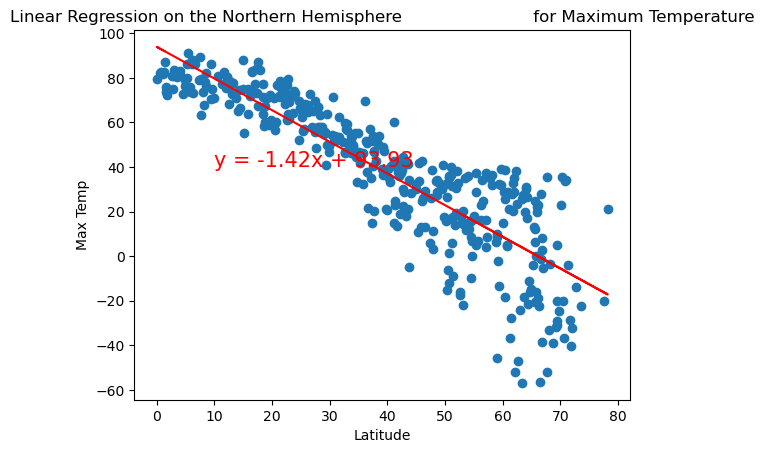

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

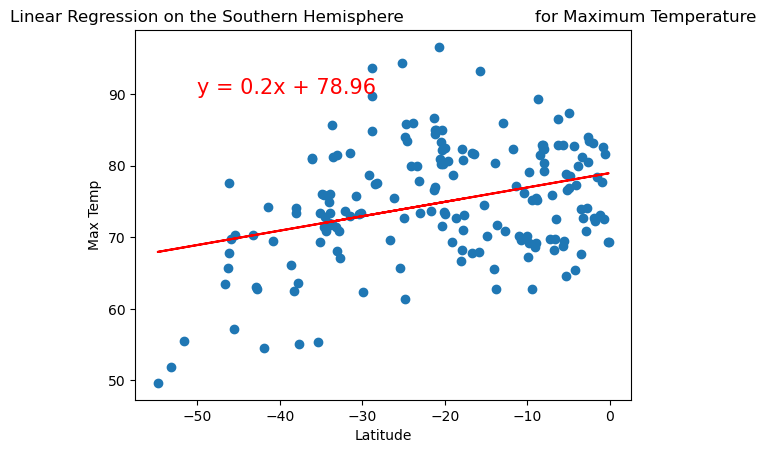

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

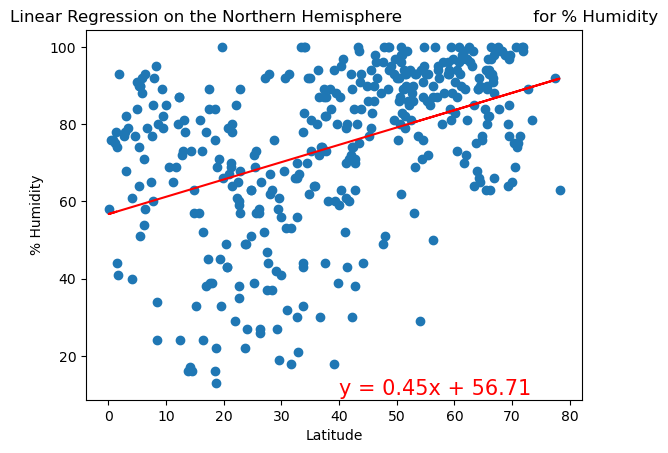

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

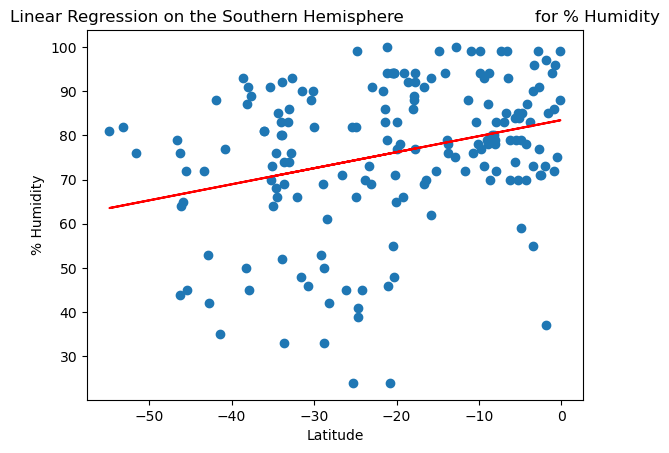

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

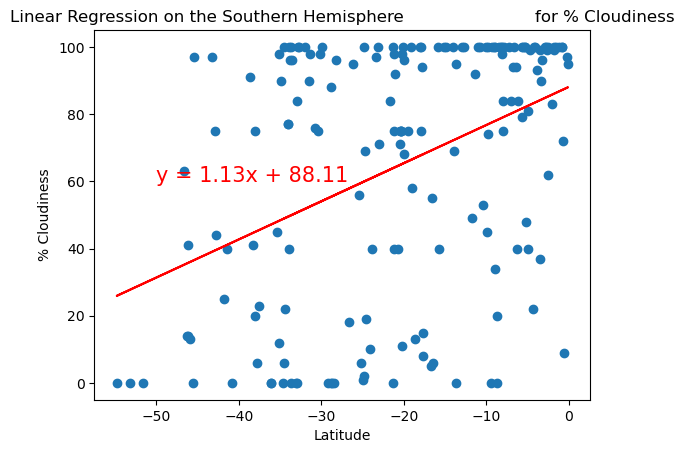

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

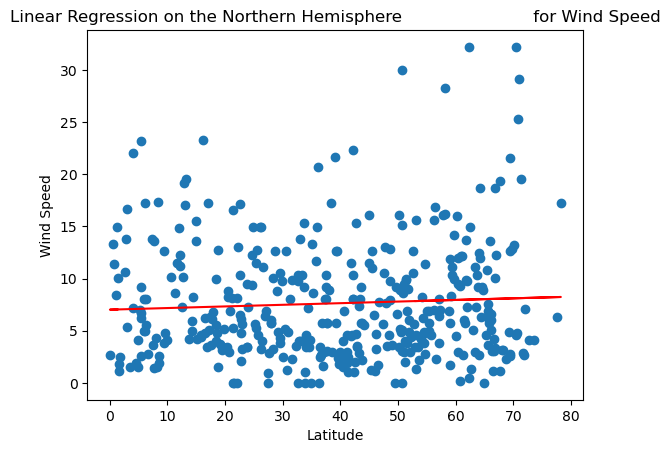

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

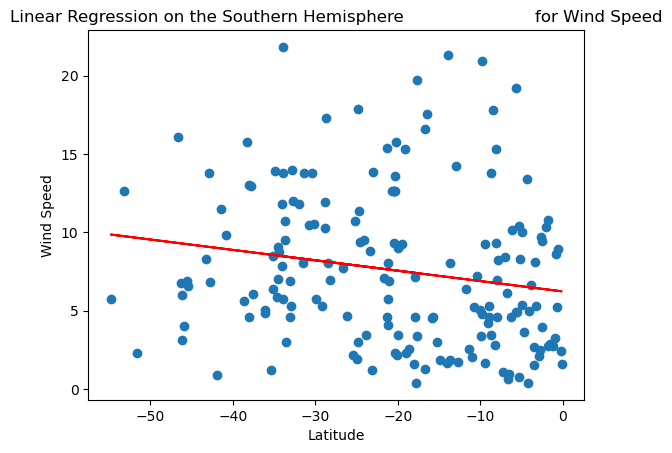

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))